In [1]:
%reload_ext autoreload
%autoreload 2

In [25]:
import glob
import random

from PIL import Image, ImageDraw, ImageFont
from pathlib import Path

import cv2

In [12]:
from tqdm import tqdm
from tqdm.notebook import tqdm, trange

In [13]:
fonts_folder = "../fonts"

fonts = glob.glob(fonts_folder + "/*.ttf")

In [14]:
def generate_image(font_path: str, target: int = None) -> tuple[Image, int]:
    color = random.randint(230, 255)
    
    # Generate image
    img = Image.new("L", (256, 256))

    if target is None:
        target = random.randint(0, 9)
    
    size = random.randint(230, 250)
    x = random.randint(50, 70)
    y = random.randint(15, 25)

    font = ImageFont.truetype(fonts[0], size)
    
    draw = ImageDraw.Draw(img)
    draw.text((x, y), str(target), color, font=font)
    
    img = img.resize((28, 28), Image.BILINEAR)
    
    return img, target

In [16]:
img, target = generate_image(fonts[0], target=1)

In [17]:
img

In [8]:
import matplotlib.pyplot as plt

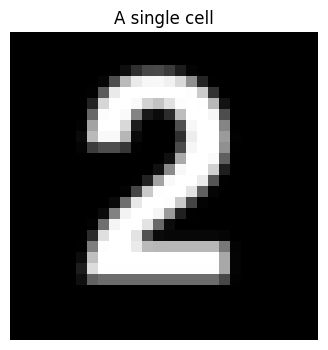

In [9]:
plt.figure(figsize=(4, 4))
plt.axis('off') # Removes axis
plt.imshow(img, cmap='gray')
plt.title("A single cell");

In [10]:
import numpy as np

In [11]:
def aaa():
    N_train = 60000
    N_val = 1000
    
    # DATASET_FOLDER = "../data/realistic_mnist"
    
    # Path(DATASET_FOLDER).mkdir(exist_ok=True)
    
    # Generate training set
    y_tr = []
    X_tr = []
    
    for i in trange(N_train):
        img, target = generate_image(fonts[0])
        X_tr.append(np.array(img).ravel())
    
        y_tr.append(target)
        # img_path = Path(DATASET_FOLDER) / f"{target}_{i}.png"
        # img.save(img_path)
    
    X_tr = np.array(X_tr)
    y_tr = np.array(y_tr)
    
    # Sanity checks
    assert X_tr.shape == (N_train, 784)
    assert y_tr.shape == (N_train, )
    
    # Generate test set
    y_val = []
    X_val = []
    
    for i in trange(N_val):
        img, target = generate_image(fonts[0])
        X_val.append(np.array(img).ravel())
    
        y_val.append(target)
    
    X_val = np.array(X_val)
    y_val = np.array(y_val)
    
    # Sanity checks
    assert X_val.shape == (N_val, 784)
    assert y_val.shape == (N_val, )

    return X_tr, y_tr, X_val, y_val

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Create dataset

In [28]:
# We start by reading and displaying the image we have shown above, this time reading it with a library so that we have it available as a Python variable.
img_path = "../../sample_data/sudoku_real_1.jpeg"

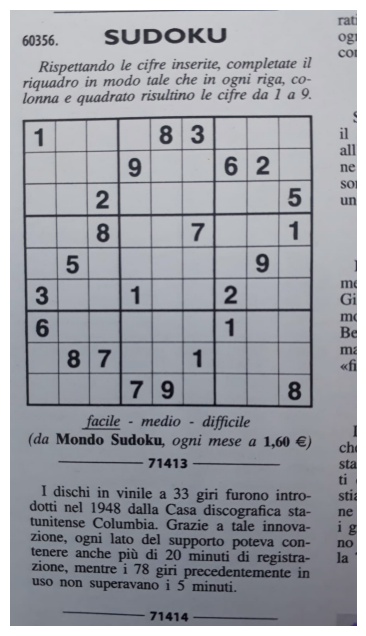

In [36]:
# We're going to use the OpenCV library, which contains many useful functions for handling images (CV stands for Computer Vision).

import cv2 # This imports the OpenCV library
import matplotlib.pyplot as plt

img = cv2.imread(img_path)
plt.figure(figsize=(8, 8))
plt.axis('off') # Removes axis
plt.imshow(img);

In [45]:
from phd_school.utils.data_preprocessing import pre_process_image, crop_and_warp, find_corners_of_largest_polygon, remove_stuff, slice_grid

def full_process(img_path):

    img = cv2.imread(img_path)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    pre_preocessed = pre_process_image(img_gray)
    
    # Find the 4 corners of the external grid
    corners = find_corners_of_largest_polygon(pre_preocessed)
    
    # Crop the image and compensate for warp
    cropped = crop_and_warp(pre_preocessed, corners)

    return cropped
    

In [ ]:
# We're going to need the estimated _single cell_'s width.
# Since we know the grid is 9 x 9 cells, and it's a square, we can simply compute that by dividing the image's width by 9
w, h = cropped.shape

W = w//9

In [41]:
# Just to make sure that it works and returns what we expect, let's try to recover the square with the 9 in the 2nd row, 4th column
# Remember that indexes start from 0, and the first one refers to rows, and the second one to columns.
test_cell = remove_stuff(slice_grid(cropped, 1, 3, W))

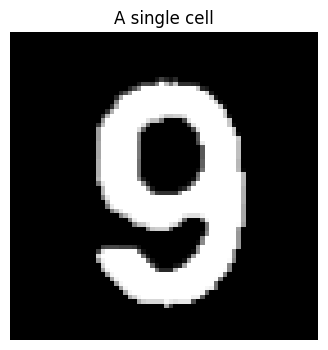

In [42]:
plt.figure(figsize=(4, 4))
plt.axis('off') # Removes axis
plt.imshow(test_cell, cmap='gray')
plt.title("A single cell");

In [63]:
sd_path = Path("../data/sudoku_digits")

In [69]:
# If you want to try other cells, it's useful to wrap the entire process (starting from the pre-processed grid) in a function
def save_cell(cropped, i, j, path, prefix: str, target, W=W):

    test_cell = slice_grid(cropped, i, j, W)
    cleaned = remove_stuff(test_cell)
    resized = cv2.resize(cleaned, (28, 28), interpolation = cv2.INTER_AREA)

    Image.fromarray(resized).save(path / f"{prefix}_{target}_{i}{j}.png")
    
    

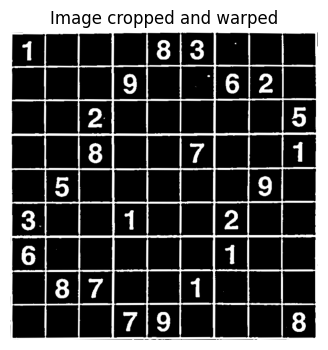

In [70]:
plt.figure(figsize=(4, 4))
plt.axis('off') # Removes axis
plt.imshow(cropped, cmap='gray')
plt.title("Image cropped and warped");

In [1]:
annotated_cells = [
    (0, 0, 1),
    (0, 4, 8),
    (0, 5, 3),

    (1, 3, 9),
    (1, 6, 6),
    (1, 7, 2),

    (2, 2, 2),
    (2, 8, 5),

    (3, 2, 8),
    (3, 5, 7),
    (3, 8, 1),

    (4, 1, 5),
    (4, 7, 9),

    (5, 0, 3),
    (5, 3, 1),
    (5, 6, 2),

    (6, 0, 6),
    (6, 6, 1),

    (7, 1, 8),
    (7, 2, 7),
    (7, 5, 1),

    (8, 3, 7),
    (8, 4, 9),
    (8, 8, 8),
    
]

In [2]:
for i, j, target in annotated_cells:
    save_cell(cropped, i, j, sd_path, "real1", target, W=W)

0 0 1
0 4 8
0 5 3
1 3 9
1 6 6
1 7 2
2 2 2
2 8 5
3 2 8
3 5 7
3 8 1
4 1 5
4 7 9
5 0 3
5 3 1
5 6 2
6 0 6
6 6 1
7 1 8
7 2 7
7 5 1
8 3 7
8 4 9
8 8 8


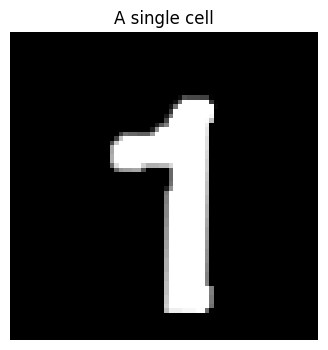

In [68]:
test_cell = remove_stuff(slice_grid(cropped, 0, 0, W))
plt.figure(figsize=(4, 4))
plt.axis('off') # Removes axis
plt.imshow(test_cell, cmap='gray')
plt.title("A single cell");

In [ ]:
1/0

In [14]:
ARTIFACTS_DIR = "../artifacts"

In [15]:
best_model = mlp_classifier

In [16]:
import pickle

# Use pickle to save model for next usage.

# Create folder if it does not exist
Path(ARTIFACTS_DIR).mkdir(exist_ok=True)

best_model_path = Path(ARTIFACTS_DIR) / 'bestest_model_sklearn.pkl'
with open(best_model_path, 'wb') as f:
    pickle.dump(best_model, f) 

In [ ]:
1/0

In [6]:
from model import LitClassification, ClassificationData
import lightning as L

In [3]:
import io, base64

def base64ToPIL(x):
	return Image.open(io.BytesIO(base64.b64decode(x.encode())))

In [4]:
printed_digits_path = Path("../data/printed_digits.csv")

NameError: name 'Path' is not defined

In [ ]:
import pandas as pd

In [ ]:
printed_digits = pd.read_csv(printed_digits_path, header=None, names=['font', 'target', 'base64'])

In [ ]:
printed_digits.head()

In [ ]:
base64ToPIL(printed_digits['base64'][32]).size

In [7]:
model = LitClassification()
data = ClassificationData()
trainer = L.Trainer(max_epochs=15)
trainer.fit(model, data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\neopa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\Local\pypoetry\Cache\virtualenvs\phd-school-PN9knR8Y-py3.11\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance

Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=15` reached.


In [28]:
trainer.save_checkpoint("best_model.ckpt")

In [8]:
model = LitClassification.load_from_checkpoint("best_model.ckpt")
model.eval();

In [19]:
import torch

In [21]:
from torchvision import transforms

# train_transform = transforms.Compose([
#     transforms.RandomRotation(10),
#     transforms.ToTensor(),
#     # AddGaussianNoise(0, 1.0),
#     AddSPNoise(0.1),
# ])

val_transforms = transforms.Compose([transforms.ToTensor()])


In [22]:
target = 4

img, target = generate_image(fonts[0], target=target)

with torch.no_grad():
    out = model(val_transforms(img).unsqueeze(0))
    _, P = torch.max(out, 1)

    digit = P.item()
    print(digit)

4


In [56]:
out

tensor([[-2.6940,  1.4751, -0.5719,  0.2334,  0.8861, -0.4532, -0.3965, -0.3106,
         -0.2303, -0.7476]])

In [23]:
import timm
timm.list_models('*densenet*')

['densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264d',
 'densenetblur121d']

In [ ]:
1/0

In [ ]:
# DEBUG

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier())])

#input data normalization
scaler = StandardScaler()
scaler.fit(X_tr)

X_tr_scaled=scaler.transform(X_tr)
X_val_scaled=scaler.transform(X_val)

### TODO ###
# Train a classifier which uses the MLPClassifier and print its accuracy
# WARNING: use the scaled features both when training and when testing the model

mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_tr_scaled, y_tr)
y_pred = mlp_classifier.predict(X_val_scaled)

print("Accuracy of model MLPClassifier = %2f%%" % (accuracy_score(y_val, y_pred )*100))

### END ###

Accuracy of model MLPClassifier = 100.000000%
